In [1]:
import lightkurve as lk
import matplotlib.pyplot as plt
from astropy.timeseries import LombScargle
import numpy as np

In [2]:
def amplitude_spectrum(t, y, fmin=None, fmax=None, freq=None, oversample_factor=10.0):
    """ 
    Calculates the amplitude spectrum of a given signal
    
    Parameters
    ----------
        t : `array`
            Time values 
        y : `array`
            Flux or magnitude measurements
        fmin : float (default None)
            Minimum frequency to calculate spectrum. Defaults to df
        fmax : float
            Maximum frequency to calculate spectrum. Defaults to Nyquist.
        oversample_factor : float
            Amount by which to oversample the spectrum. Defaults to 10.
    """
    tmax = t.max()
    tmin = t.min()
    df = 1.0 / (tmax - tmin)

    if fmin is None:
        fmin = df
    if fmax is None:
        fmax = 0.5 / np.median(np.diff(t))  # *nyq_mult
    if freq is None:
        freq = np.arange(fmin, fmax, df / oversample_factor)
    model = LombScargle(t, y)
    sc = model.power(freq, method="fast", normalization="psd")

    fct = np.sqrt(4.0 / len(t))
    amp = np.sqrt(sc) * fct

    return freq, amp

In [3]:
roap1 = lk.search_lightcurve('TIC 17676722', exptime=120).download_all().stitch().remove_nans() # HD 63773
# roap2 = lk.search_lightcurve('TIC 394272819', exptime=120).download_all().stitch().remove_nans() # HD 115226

In [4]:
plt.style.use('science')

In [5]:
import numpy as np
import starry

starry.config.lazy = False
starry.config.quiet = True

In [6]:
contrast = 0.25
radius = 15
map = starry.Map(ydeg=20)
# map = starry.Map(udeg=2)
# map[1] = 0.5
# map[2] = 0.25

map.spot(contrast=0.25, radius=radius, lon=0, lat=55)
map.spot(contrast=0.25, radius=20, lon=-180, lat=-55)

map.obl = 23.5
map.inc = 70.0

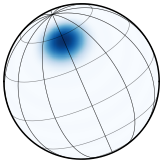

In [7]:
map.show(cmap='Blues_r')

In [8]:
plt.rcParams['axes.unicode_minus'] = False

/home/daniel/anaconda3/envs/starry/lib/python3.7/site-packages/lightkurve/lightcurve.py:215: LightkurveDeprecationWarning: passing flux as a positional argument is deprecated, please use ``flux=...`` instead.
  LightkurveDeprecationWarning,


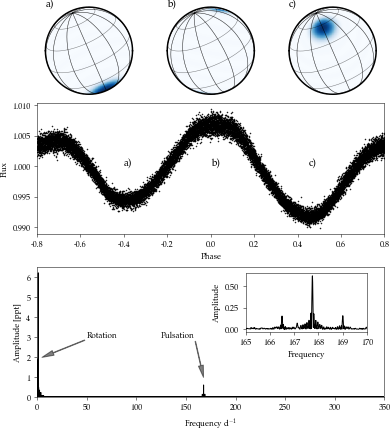

In [29]:

axes = plt.figure(constrained_layout=True, figsize=[5.5, 6]).subplot_mosaic(
    """
    abc
    ddd
    eee
    """,
    gridspec_kw={
        # set the height ratios between the rows
        "height_ratios": [0.7, 1, 1],
        # set the width ratios between the columns
#         "width_ratios": [1, 3.5, 1],
    },
)
ax = axes['a']
map.show(ax=ax, cmap='Blues_r', theta=180)
ax.text(-1,1,'a)')
ax = axes['b']
map.show(ax=ax, cmap='Blues_r', theta=107)
ax.text(-1,1,'b)')
ax = axes['c']
map.show(ax=ax, cmap='Blues_r', theta=0)
ax.text(-1,1,'c)')

ax = axes['d']
x = roap1.time.value
m = x < 1600
x = x[m]
y = roap1.flux.value[m]


# ax.plot(x, y, '.k')
# ax.set_xlim(1495.1, 1496.75)
lc = lk.LightCurve(x, y)
folded = lc.fold(1.5995, epoch_phase=0.6)
ax.plot(folded.time.value, folded.flux.value, '.k', markersize=1, rasterized=True)
ax.set(xlim=[-0.8, 0.8], xlabel='Phase', ylabel='Flux')
ax.text(-0.4, 1., 'a)')
ax.text(0., 1., 'b)')
ax.text(0.45, 1., 'c)')

ax = axes['e']
f, a = amplitude_spectrum(x, y)
ax.plot(f,a*1e3, 'k')
ax.set(xlabel='Frequency d$^{-1}$', ylabel='Amplitude [ppt]', xlim=[0, 350], ylim=[0, None])
ax2 = ax.inset_axes([0.6, 0.5, 0.35, 0.45])

f, a = amplitude_spectrum(x, y, fmin=165, fmax=170)
ax2.plot(f, a*1e3, c='k')
ax2.set(xlim=[165, 170], xlabel='Frequency', ylabel='Amplitude')

ax.annotate('Pulsation', (167.7, 1), (125, 3), fontsize=8, arrowprops=dict(facecolor='black', width=0.5, shrink=1, headwidth=5, alpha=0.5))
ax.annotate('Rotation', (5, 2), (50, 3), fontsize=8, 
                   arrowprops=dict(facecolor='black', width=0.5, shrink=1, headwidth=5, alpha=0.5))

plt.savefig('HD63773.pdf', dpi=300, bbox_inches='tight', pad_inches=0.)

In [89]:
theta = np.linspace(0, 360, 50)
map.show(theta=theta, cmap='Blues_r')

In [86]:
map.show?

Signature: map.show(**kwargs)
Docstring:
Display an image of the map, with optional animation. See the
docstring of :py:meth:`render` for more details and additional
keywords accepted by this method.

Args:
    ax (optional): A matplotlib axis instance to use. Default is
        to create a new figure.
    cmap (string or colormap instance, optional): The matplotlib colormap
        to use. Defaults to ``plasma``.
    figsize (tuple, optional): Figure size in inches. Default is
        (3, 3) for orthographic maps and (7, 3.5) for rectangular
        maps.
    projection (string, optional): The map projection. Accepted
        values are ``ortho``, corresponding to an orthographic
        projection (as seen on the sky), ``rect``, corresponding
        to an equirectangular latitude-longitude projection,
        and ``moll``, corresponding to a Mollweide equal-area
        projection. Defaults to ``ortho``.
    colorbar (bool, optional): Display a colorbar? Default is False.
    grid (

TypeError: 'AxesSubplot' object is not subscriptable

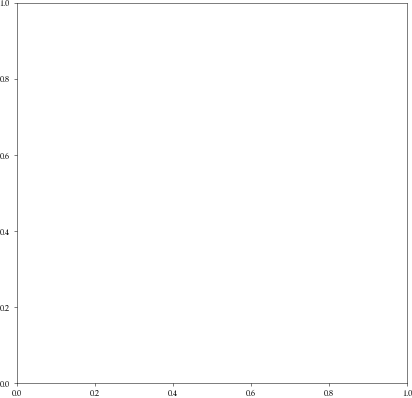

In [33]:

fig, axes = plt.subplots(constrained_layout=False, figsize=[7,7])#.subplot_mosaic(
#     """
#     AA
#     BC
#     """,
#     gridspec_kw={
#         # set the height ratios between the rows
#         "height_ratios": [1, 0.7],
#     }
# )

ax = axes[0]
x = roap1.time.value
m = x < 1600
x = x[m]
y = roap1.flux.value[m]

f, a = amplitude_spectrum(x, y)
ax.plot(f,a*1e3, 'k')
ax.set(xlabel='Frequency d$^{-1}$', ylabel='Amplitude [ppt]', xlim=[0, 350], ylim=[0, None])
# ax.plot(x % 1.5995 / 1.5995, y, ',k')

ax2 = ax.inset_axes([0.5, 0.5, 0.45, 0.45])
ax2.plot(x % 1.5995 / 1.5995, y, ',k')
ax2.set(xlim=[0, 1], xlabel='Phase', ylabel='Flux')


ax = axes[1]
x = roap2.time.value
m = x < 1600
x = x[m]
y = roap2.flux.value[m]

f, a = amplitude_spectrum(x, y)
ax.plot(f,a*1e3, 'k')
ax.set(xlabel='Frequency d$^{-1}$', ylabel='Amplitude [ppt]', 
       xlim=[0, 350], 
       ylim=[0, None])
# ax.plot(x % 1.5995 / 1.5995, y, ',k')


ax2 = ax.inset_axes([0.5, 0.5, 0.45, 0.45])
ax2.plot(x % 2.98827 / 2.98827, y, ',k')
ax2.set(xlim=[0, 1], xlabel='Phase', ylabel='Flux')

# ax = axes['B']
# ax.plot(f,a)
# ax.set(xlim=[0, 5])

# ax = axes['C']
# ax.plot(f,a)
# ax.set(xlim=[165, 170])

<AxesSubplot:xlabel='Phase [JD]', ylabel='Normalized Flux'>

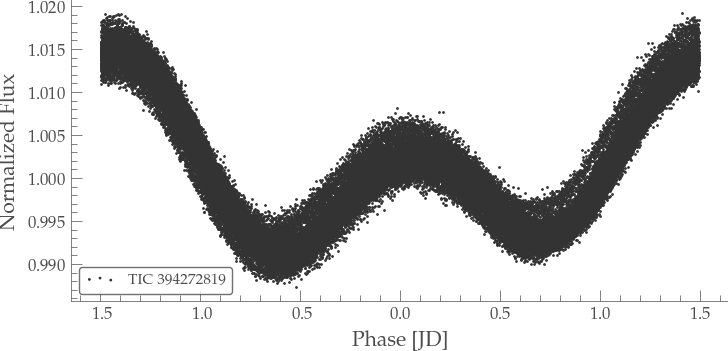

In [21]:
roap2.fold(2.98827).scatter()
# ax.set_xlim(1500, 1550)

(165.0, 170.0)

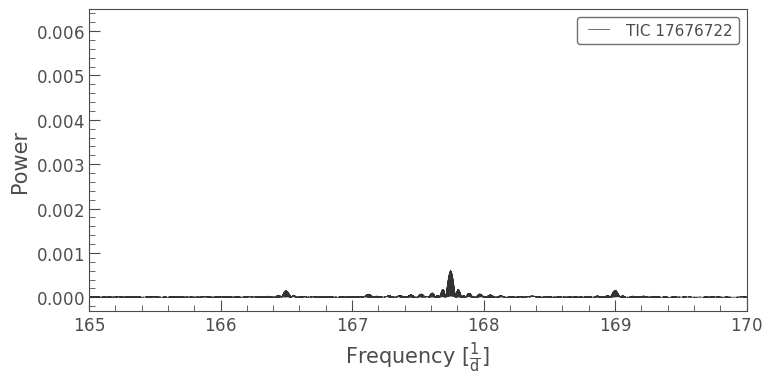

In [9]:
ax = alpha_cir.to_periodogram().plot()
ax.set_xlim(165, 170)